### 2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
df.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X = df.drop("MEDV",axis=1)   #Feature Matrix #independent variable
y = df["MEDV"] #dependent variables

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X.head()#independent variable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [10]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


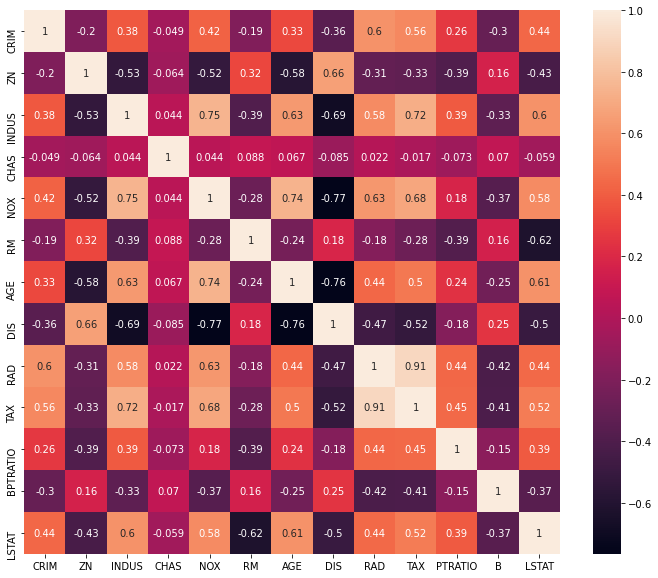

In [11]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [8]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):#X_train,0.5
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):#0-13 #traverse through the rows
        for j in range(i): #traverse through column
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.5)#data,threshold
len(set(corr_features))

7

In [10]:
corr_features

{'AGE', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'RAD', 'TAX'}

In [15]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,CHAS,RM,PTRATIO,B
329,0.06724,0.0,0.0,6.333,16.9,375.21
371,9.23230,0.0,0.0,6.216,20.2,366.15
219,0.11425,0.0,1.0,6.373,16.4,393.74
403,24.80170,0.0,0.0,5.349,20.2,396.90
78,0.05646,0.0,0.0,6.232,18.7,386.40
...,...,...,...,...,...,...
4,0.06905,0.0,0.0,7.147,18.7,396.90
428,7.36711,0.0,0.0,6.193,20.2,96.73
385,16.81180,0.0,0.0,5.277,20.2,396.90
308,0.49298,0.0,0.0,6.635,18.4,396.90


#### Let try with Big Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [27]:
df=pd.read_csv("D:/My Documents/Machine Learning/DataSets/santander-customer-satisfaction/train.csv.zip",nrows=10000)


In [28]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27745.740000,1
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120468.090000,0
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98462.880000,0
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102070.770000,0


In [29]:
X=df.drop(labels=['TARGET'], axis=1) #indep. variable
y=df['TARGET'] #dependeent var
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3, #30% 
    random_state=0)

In [33]:
X_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,0.003868,-0.007921,0.026313,0.010195,0.003226,-0.001037,-0.008416,0.009563,0.001776,...,-0.016729,-0.015758,-0.010380,-0.013348,-0.012468,-0.004889,0.008355,-0.010153,-0.007876,-0.003619
var3,0.003868,1.000000,-0.009840,0.000892,0.004527,0.004604,0.000984,0.001146,0.000417,0.000477,...,0.000247,0.000412,0.000428,0.000433,0.000452,0.000570,0.000337,0.000671,0.000669,-0.000065
var15,-0.007921,-0.009840,1.000000,0.033884,0.117646,0.124938,0.059411,0.074257,0.018217,0.019172,...,0.019788,0.026903,0.024832,0.027281,0.027676,0.022812,0.031673,0.024141,0.023195,-0.005522
imp_ent_var16_ult1,0.026313,0.000892,0.033884,1.000000,0.017469,0.015492,0.010331,0.007650,-0.000866,-0.000991,...,0.037854,-0.000822,-0.000812,-0.000867,-0.000899,-0.001184,-0.000700,-0.001394,-0.001391,0.001352
imp_op_var39_comer_ult1,0.010195,0.004527,0.117646,0.017469,1.000000,0.877170,0.506263,0.455786,0.052864,0.068169,...,0.016903,0.017639,0.044972,0.024841,0.032876,-0.001352,-0.003516,0.000278,0.000051,0.006273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.004889,0.000570,0.022812,-0.001184,-0.001352,0.001320,-0.001268,-0.001421,-0.000555,-0.000636,...,-0.000329,-0.000527,-0.000521,-0.000556,-0.000576,1.000000,0.617695,0.920544,0.933605,0.000002
saldo_medio_var44_hace3,0.008355,0.000337,0.031673,-0.000700,-0.003516,0.000460,-0.000750,-0.000840,-0.000328,-0.000376,...,-0.000195,-0.000312,-0.000308,-0.000329,-0.000341,0.617695,1.000000,0.521398,0.474861,-0.004989
saldo_medio_var44_ult1,-0.010153,0.000671,0.024141,-0.001394,0.000278,0.000916,-0.001492,-0.001672,-0.000654,-0.000748,...,-0.000388,-0.000621,-0.000613,-0.000655,-0.000679,0.920544,0.521398,1.000000,0.983012,-0.000798
saldo_medio_var44_ult3,-0.007876,0.000669,0.023195,-0.001391,0.000051,0.000364,-0.001489,-0.001669,-0.000652,-0.000747,...,-0.000387,-0.000620,-0.000612,-0.000653,-0.000677,0.933605,0.474861,0.983012,1.000000,0.000160


<AxesSubplot:>

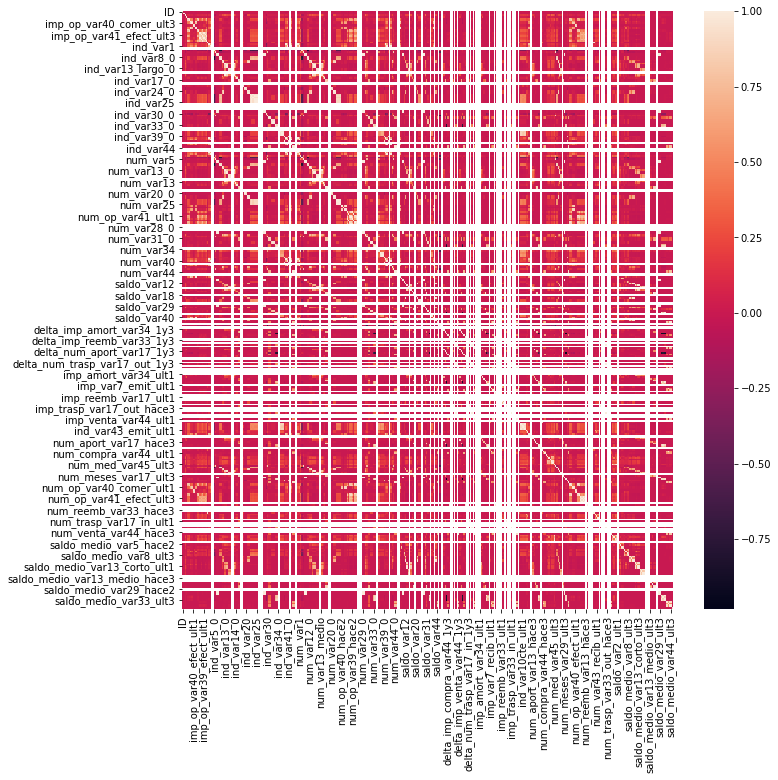

In [22]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
#fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):#X_train,0.7
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): #traverse through the rows
        for j in range(i): #traverse through column
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(X_train, 0.7) #columns having correlation more than 70%
len(set(corr_features))#out of 371 columns 216 columns is giving me similar information(371 column ~ 90%,155 column ~ 89.5%)

216

In [31]:
corr_features

{'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_aport_var33_ult1',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trans_var37_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_cor

In [34]:
X_train.drop(corr_features,axis=1,inplace= True)

In [35]:
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var29_hace2,saldo_medio_var29_hace3,var38
7681,15431,2,42,840.0,4477.02,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,37491.21
9031,18181,2,31,0.0,52.32,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,106685.94
3691,7411,2,51,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,66144.66
202,407,2,36,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,92121.36
5625,11280,2,23,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,117547.89
4859,9723,2,24,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,71050.83
3264,6557,2,24,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,141069.33
9845,19796,2,38,0.0,0.00,0.0,0,150.0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,86412.15
